In [1]:
import pandas as pd
import numpy as np

cc = pd.read_csv('CovidData.csv')

cc.head()

,Unnamed: 0,id,first_name,last_name,gender,Risky Genes,DrugCode
0,0,1,Roldan,Lush,Male,TOMM7,ORIG-1
1,1,2,Kylie,Frissell,Male,CLUAP1,SUPPL-35
2,2,3,Leicester,Mival,Male,SPEG,SUPPL-18
3,3,4,Granny,Antunez,Male,SPEG,SUPPL-18
4,4,5,Rowan,McQueen,Female,DNAH7,SUPPL-35


In [2]:
cc.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
cc.columns

Index(['id', 'first_name', 'last_name', 'gender', 'Risky Genes', 'DrugCode'], dtype='object')

In [25]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   first_name   1000 non-null   object
 2   last_name    1000 non-null   object
 3   gender       1000 non-null   object
 4   Risky Genes  1000 non-null   object
 5   DrugCode     1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
cc.dropna()

,id,first_name,last_name,gender,Risky Genes,DrugCode
0,1,Roldan,Lush,Male,TOMM7,ORIG-1
1,2,Kylie,Frissell,Male,CLUAP1,SUPPL-35
2,3,Leicester,Mival,Male,SPEG,SUPPL-18
3,4,Granny,Antunez,Male,SPEG,SUPPL-18
4,5,Rowan,McQueen,Female,DNAH7,SUPPL-35
...,...,...,...,...,...,...
995,996,Egbert,Bannister,Bigender,DNAH7,SUPPL-35
996,997,Joice,Bester,Male,DES,SUPPL-18
997,998,Yoshi,Dewfall,Male,CLUAP1,SUPPL-35
998,999,Ahmad,Yeaman,Male,WSB1,ORIG-1


In [5]:
cc.isnull().sum()

id             0
first_name     0
last_name      0
gender         0
Risky Genes    0
DrugCode       0
dtype: int64

In [20]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['id','first_name','last_name','gender','Risky Genes','DrugCode'])                            
cc1=encoder.fit_transform(cc)


In [21]:
corr = np.round(cc1.corr(),2)
print(corr)

               id  first_name  last_name  gender  Risky Genes  DrugCode
id           1.00        0.93       0.99    0.07         0.01      0.02
first_name   0.93        1.00       0.92    0.08         0.01      0.03
last_name    0.99        0.92       1.00    0.06         0.01      0.02
gender       0.07        0.08       0.06    1.00         0.01     -0.01
Risky Genes  0.01        0.01       0.01    0.01         1.00      0.34
DrugCode     0.02        0.03       0.02   -0.01         0.34      1.00


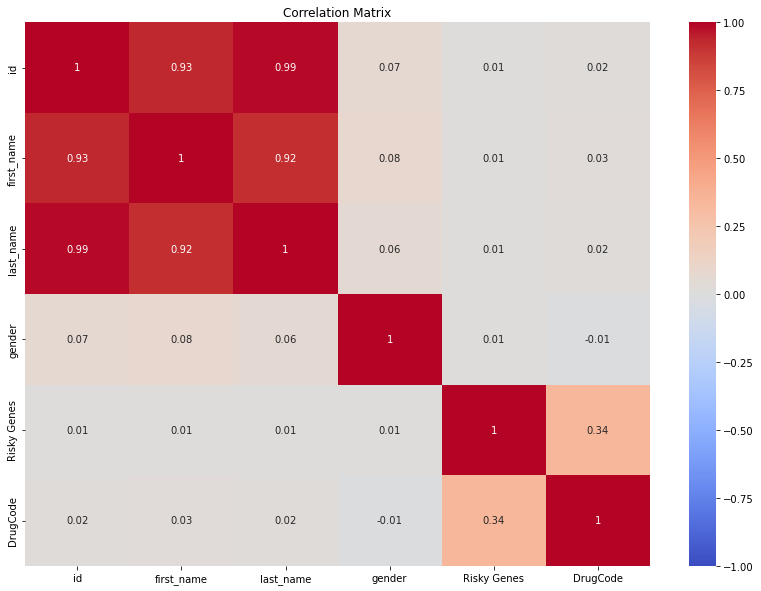

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



fig, ax = plt.subplots(figsize = (14, 10))
 
sns.heatmap(ax = ax, \
            data = corr, \
            annot = True, \
            cmap = "coolwarm", \
            vmin = -1, vmax= 1, center = 0)
 
ax.set_title("Correlation Matrix")
 
plt.show()

plt.savefig('Cor_Mat.png')

In [24]:
from scipy import stats

x=cc1['Risky Genes']
y=cc1['DrugCode']


def cramers_v(x, y):
    n = len(x)
    cont_table = pd.crosstab(x, y)
    chi_sq = stats.chi2_contingency(cont_table, correction=False)[0]
    phi_sq = chi_sq/n
     
    c, r = cont_table.shape
     
    c_corr = c - ((c - 1)**2 / n-1)
    r_corr = r - ((r - 1)**2 / n-1)
     
    phi_sq_corr = max(0, (chi_sq / n) - ((c-1)*(r-1) / n-1))
     
    corr_v = (phi_sq_corr / min(c_corr - 1, r_corr - 1)) ** 0.5
     
    return corr_v

cramers_v(x,y)

0.9984954856073468

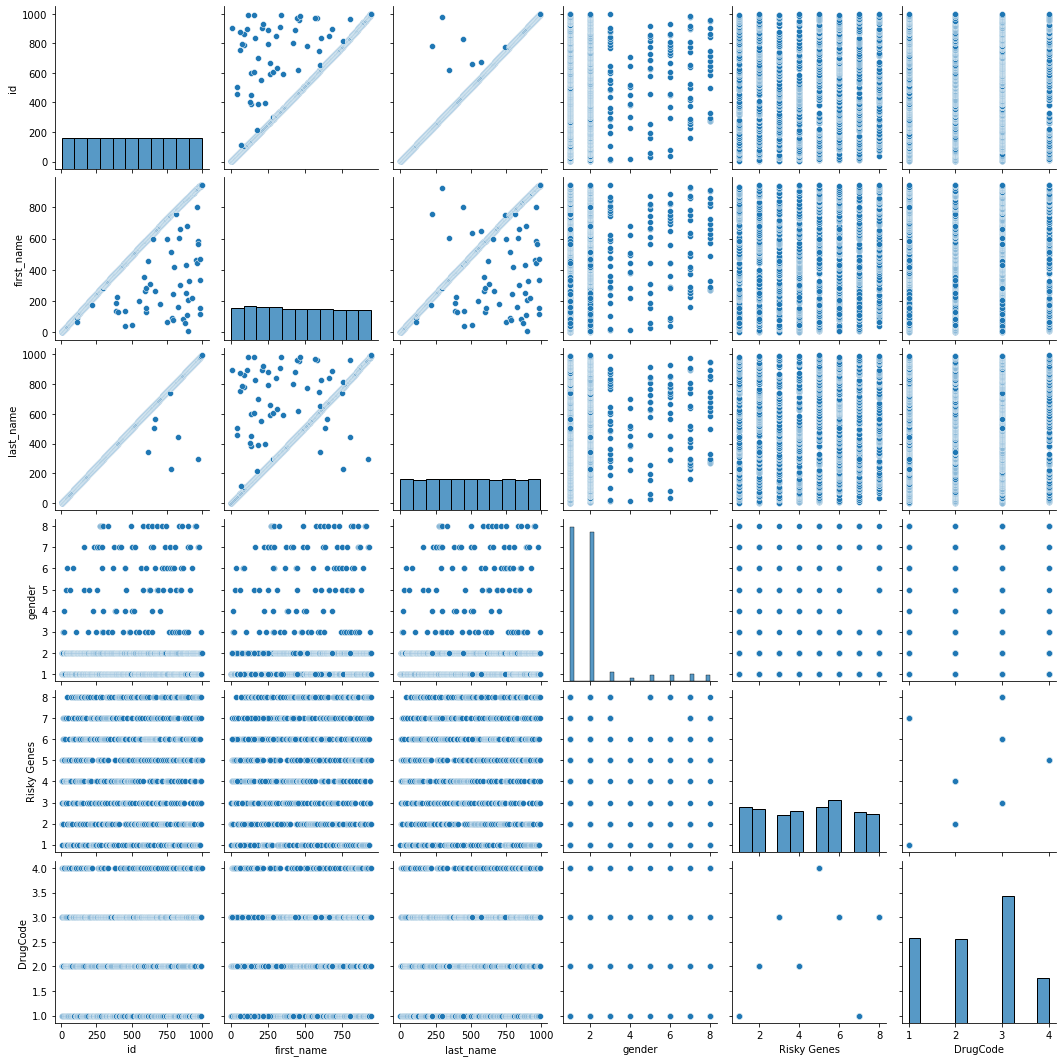

In [32]:
sns.pairplot(cc1)
plt.show()

In [29]:
group= cc.groupby(['DrugCode'])['gender']).count()
group.to_csv('group1.csv')

In [21]:
#understanding data with visualization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


rg = cc['Risky Genes'].value_counts()
rg.to_csv('ris.csv')
rg1=pd.read_csv('ris.csv')
rg1.columns = ['RiskyGenes','Numbers']
rg1.head()

,RiskyGenes,Numbers
0,STXBP5,152
1,TOMM7,132
2,,132
3,CLUAP1,127
4,DNAH7,119


In [22]:
plt.style.use('ggplot')
%matplotlib
fig = plt.figure(figsize =(10, 7))
plt.bar(rg1.RiskyGenes,rg1.Numbers)
plt.title('The Number of Risky Genes')
plt.show()

Using matplotlib backend: MacOSX


In [152]:
gd = cc['gender'].value_counts()
gd.to_csv('gendis.csv')
gd1=pd.read_csv('gendis.csv')
gd1.columns = ['gender','Numbers']
gd1.head()

,gender,Numbers
0,Male,453
1,Female,437
2,Bigender,26
3,Polygender,21
4,Genderqueer,18


In [23]:
data_pie=cc['gender'].value_counts().rename_axis('Gender').reset_index(name='gender_counts')
plt.figure(figsize=(7,7))
plt.pie(data_pie.gender_counts, labels=data_pie.Gender, startangle=90, autopct='%0.1f%%')
plt.title('Gender of Patients')
plt.show()


In [9]:
#deciding classification method

X=cc.drop(['DrugCode'],axis=1)
y=cc['DrugCode']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [10]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['id','first_name','last_name','gender','Risky Genes'])                            
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)
X_train.head()

,id,first_name,last_name,gender,Risky Genes
253,1,1,1,1,1
667,2,2,2,2,1
85,3,3,3,2,2
969,4,4,4,2,3
75,5,5,5,2,1


In [17]:
corr = np.round(X_train.corr(),6)
print(corr)

                   id  first_name  last_name    gender  Risky Genes
id           1.000000    0.945259   0.991080 -0.038898    -0.024879
first_name   0.945259    1.000000   0.935943 -0.017805    -0.033819
last_name    0.991080    0.935943   1.000000 -0.039493    -0.032299
gender      -0.038898   -0.017805  -0.039493  1.000000     0.055343
Risky Genes -0.024879   -0.033819  -0.032299  0.055343     1.000000


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)
y_pred_gini= clf_gini.predict(X_test)
print(' The accuracy of DecisionTree: {0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))


 The accuracy of DecisionTree: 0.9040


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
pred = gnb.fit(X_train, y_train).predict(X_test)
print("The accuracy of Naive-Bayes: ",accuracy_score(y_test, pred, normalize = True))

The accuracy of Naive-Bayes:  0.596


In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc_model = LinearSVC(random_state=0)
pred = svc_model.fit(X_train, y_train).predict(X_test)
print("The accuracy of LinearSVC: ",accuracy_score(y_test, pred, normalize = True))

The accuracy of LinearSVC:  0.372


/Users/kubranur/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print ("The accuracy of KNeighbors: ",accuracy_score(y_test, pred))

The accuracy of KNeighbors:  0.392


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import mglearn
P,t=mglearn.datasets.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split
P_train,P_test,t_train,t_test = train_test_split(P,t,test_size = 0.25,random_state = 0)

LR = LinearRegression().fit(P_train,t_train)
print("The accuracy of Linear Regression: ",LR.score(P_train,t_train))

The accuracy of Linear Regression:  0.6592061059587275


In [18]:
# continuing with Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(X_train,y_train)
y_pred_gini= clf_gini.predict(X_test)
print('Train data - accuracy: {0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))

y_pred_train_gini= clf_gini.predict(X_train)
print('Test data - accuracy: {0:0.4f}'. format(accuracy_score(y_train,y_pred_train_gini)))

Train data - accuracy: 0.9040
Test data - accuracy: 0.8747


[Text(409.19999999999993, 570.7800000000001, 'X[4] <= 3.5\ngini = 0.723\nsamples = 750\nvalue = [100, 192, 273, 185]'),
 Text(223.2, 407.70000000000005, 'X[4] <= 2.5\ngini = 0.663\nsamples = 266\nvalue = [100, 0, 76, 90]'),
 Text(148.79999999999998, 244.62, 'X[4] <= 1.5\ngini = 0.496\nsamples = 166\nvalue = [0, 0, 76, 90]'),
 Text(74.39999999999999, 81.53999999999996, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 76, 0]'),
 Text(223.2, 81.53999999999996, 'gini = 0.0\nsamples = 90\nvalue = [0, 0, 0, 90]'),
 Text(297.59999999999997, 244.62, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0, 0]'),
 Text(595.1999999999999, 407.70000000000005, 'X[4] <= 6.5\ngini = 0.638\nsamples = 484\nvalue = [0, 192, 197, 95]'),
 Text(446.4, 244.62, 'X[4] <= 4.5\ngini = 0.466\nsamples = 305\nvalue = [0, 192, 113, 0]'),
 Text(371.99999999999994, 81.53999999999996, 'gini = 0.0\nsamples = 98\nvalue = [0, 98, 0, 0]'),
 Text(520.8, 81.53999999999996, 'gini = 0.496\nsamples = 207\nvalue = [0, 94, 113, 0]'),
 Text(743.

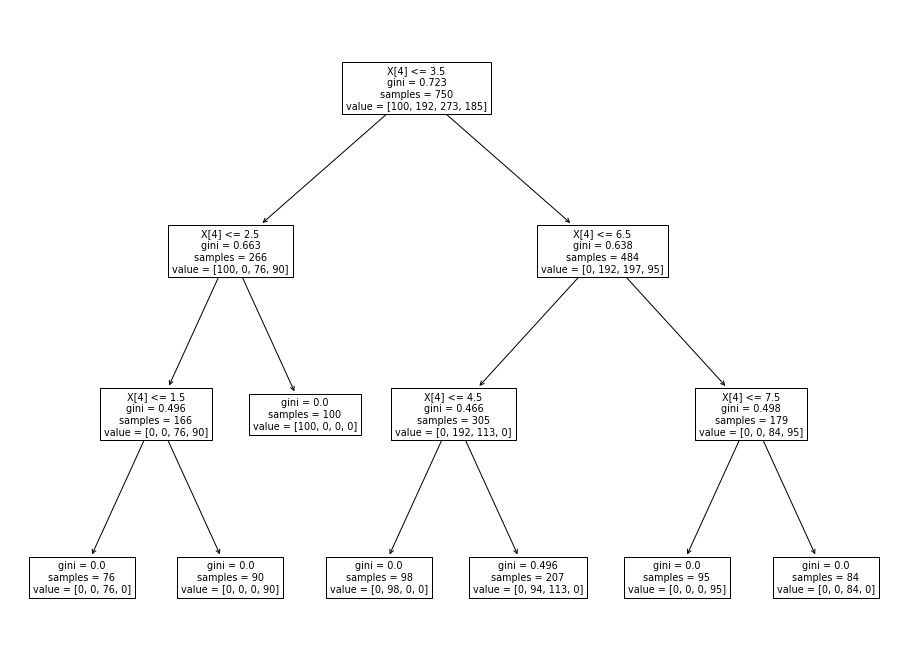

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

[Text(716.1000000000001, 570.7800000000001, 'Risky Genes <= 3.5\ngini = 0.723\nsamples = 750\nvalue = [100, 192, 273, 185]\nclass = SUPPL-18'),
 Text(390.6, 407.70000000000005, 'Risky Genes <= 2.5\ngini = 0.663\nsamples = 266\nvalue = [100, 0, 76, 90]\nclass = ORIG-1'),
 Text(260.40000000000003, 244.62, 'Risky Genes <= 1.5\ngini = 0.496\nsamples = 166\nvalue = [0, 0, 76, 90]\nclass = None'),
 Text(130.20000000000002, 81.53999999999996, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 76, 0]\nclass = SUPPL-18'),
 Text(390.6, 81.53999999999996, 'gini = 0.0\nsamples = 90\nvalue = [0, 0, 0, 90]\nclass = None'),
 Text(520.8000000000001, 244.62, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0, 0]\nclass = ORIG-1'),
 Text(1041.6000000000001, 407.70000000000005, 'Risky Genes <= 6.5\ngini = 0.638\nsamples = 484\nvalue = [0, 192, 197, 95]\nclass = SUPPL-18'),
 Text(781.2, 244.62, 'Risky Genes <= 4.5\ngini = 0.466\nsamples = 305\nvalue = [0, 192, 113, 0]\nclass = SUPPL-35'),
 Text(651.0000000000001, 81.5

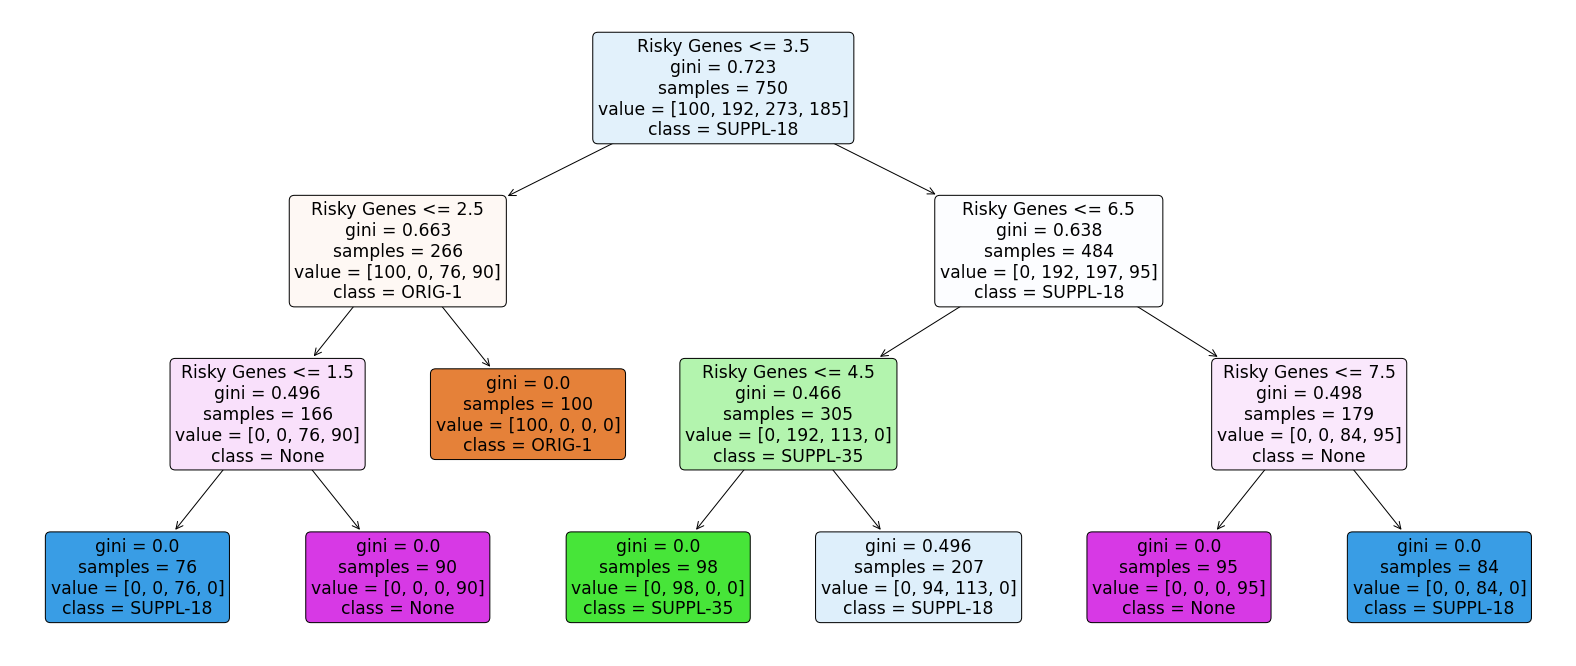

In [9]:
from sklearn.tree import plot_tree


plt.figure(figsize=(28,12))

feature_names = cc.columns[:5]
target_names = cc['DrugCode'].unique().tolist()

f=plot_tree(clf_gini.fit(X_train, y_train), 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
f



In [19]:
from dtreeviz.trees import dtreeviz # remember to load the package



encoder = ce.OrdinalEncoder(cols=['DrugCode'])                            
y_train=encoder.fit_transform(y_train)

plt.figure(figsize=(16,16))

feature_names = cc.columns[:5]
target_names = cc['DrugCode'].unique().tolist()

viz = dtreeviz(clf_gini.fit(X_train, y_train),
                target_name="target",
                feature_names=feature_names,
                class_names=list(target_names))

viz



AttributeError: 'NoneType' object has no attribute 'dtype'

<Figure size 1152x1152 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 253 to 684
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   DrugCode  750 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [1]:
!pip install dtreeviz


     |████████████████████████████████| 62 kB 559 kB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=df20cedc1573477138f82ae8d3ed321f47f32f6591532a6aa72437ba2deff8c9
  Stored in directory: /Users/kubranur/Library/Caches/pip/wheels/53/2c/23/156e13a0e7aad1b2fef5f5566d227829565a112e3dc1a59c0d
Successfully built dtreeviz


In [21]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz


ValueError: y_data needs to consist only of numerical values. could not convert string to float: 'ORIG-1'